# Characteristic Treatment of 1d Shallow Water Equations
Shallow water equations in one dimension (x): <br /> 

$\partial_t (h) + \partial_x (hu) = 0$ <br /> 
$\partial_t (hu) + \partial_x (hu^2 + \frac{1}{2}gh^2) = 0$ <br /> 

where,<br /> 

$h(x,t)$ = depth of constant density fluid <br /> 
$u(x,t)$ = velocity of constant density fluid  <br /> 
$g$ is the acceleration of gravity, assumed constant <br /> 


We can write the shallow water equations in the formalism of Jeremy's lecture 1 as follows : <br />  

$\partial_t \bf{q} + \bf{W} \cdot \partial_x \bf{q} = \bf{s}$ <br /> 

$\bf{q} =\begin{bmatrix}
    h\\
    hu \\
\end{bmatrix}
$ 
;
$\bf{W} = \begin{bmatrix}
    0&1\\
    gh-u^2&2u \\
\end{bmatrix} 
$
;
$\bf{s} =\begin{bmatrix}
    0\\
    0\\
\end{bmatrix}
$ <br />


Treating things as a small perturbation against a constant background we seek $\delta \bf{q}$ which satisfy the equation:<br />
$\frac{\partial \delta \bf{q}}{\partial t} = - \bf{W}_0 \cdot \frac{\partial \delta \bf{q}}{\partial x}$ <br />

Non trivial solutions will have the form $\delta \bf{q}$ $\propto e^{ikx-wt}$ with $k/w$ as eigen values of $\bf{W}_0$ . In the case of the shallow water equations, these eigen values are $V_-$ = $u - \sqrt{gh}$ and $V_+$ = $u + \sqrt{gh}$, with corresponding eigen-vectors: <br />
$\bf{V_-} = \begin{bmatrix}
    1\\
    u - \sqrt{gh} \\
\end{bmatrix}$ 
;
$\bf{V_+} = \begin{bmatrix}
    1\\
    u + \sqrt{gh} \\
\end{bmatrix}
$ <br />

These eigen values are "characteristic velocities" which describe characateristic curves:

$\frac{dx}{dt}=V_\pm$ . <br />

Along each of these curves there is a corresponding Riemann invariant which will satisfy: <br />
$\frac{\partial R}{\partial t} + \frac{\partial R}{\partial x} \frac{dx}{dt} = 0 $ <br />
In our 1d shallow-water case, these are: <br />
$R_- = \delta u - \delta h\sqrt{g/h} $ and $R_+ = \delta u + \delta h\sqrt{g/h}$

# Linear Dam-break Problem
To see this in action, let's examine the linear dam break problem. The set up is that you have two different depths of water separated by a dam. The dam is suddenly removed... what happens?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Figure 2.')

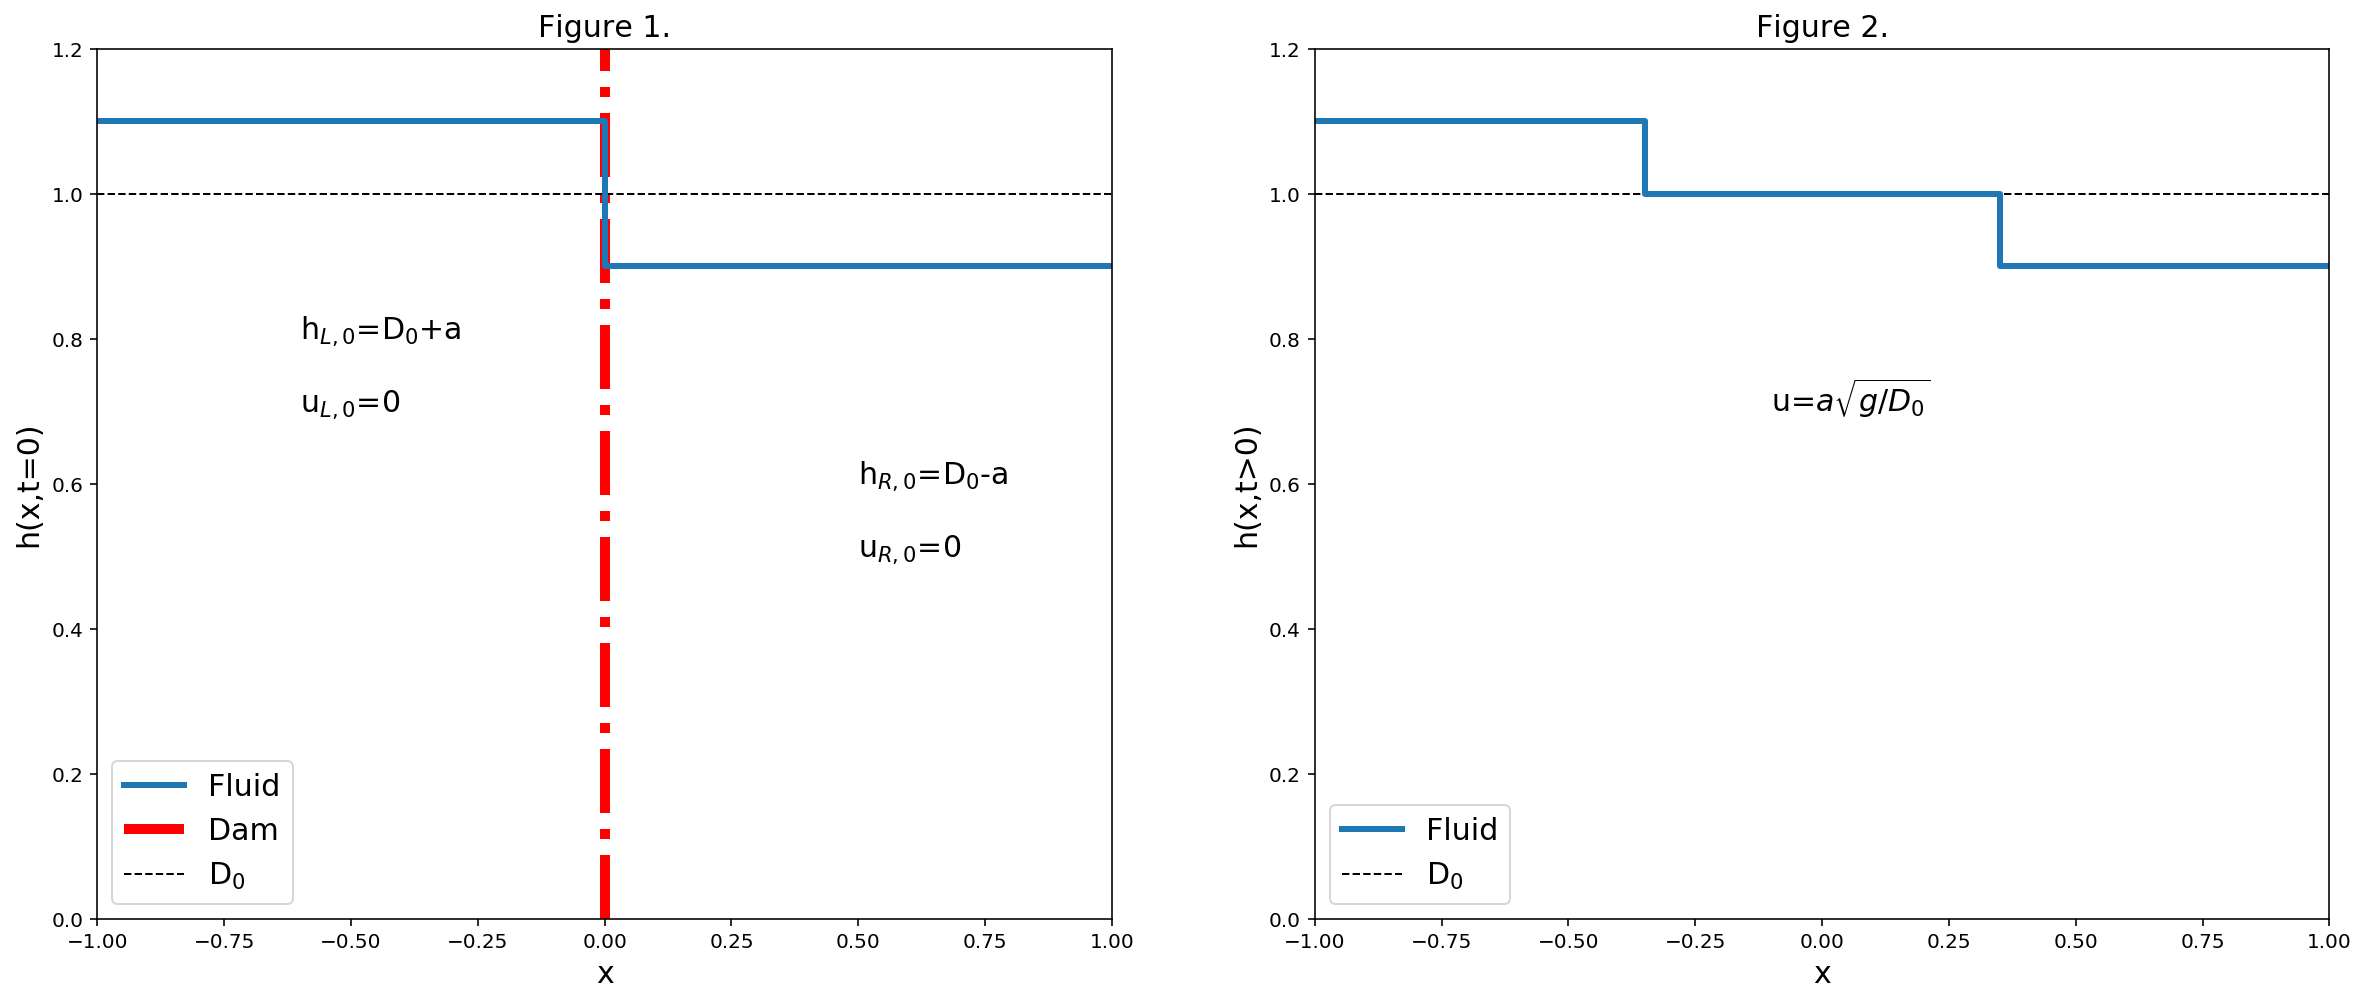

In [33]:
# initial conditions figure
D = 1.0
a = 0.1
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot([-1,0,0,1],[D+a,D+a,D-a,D-a],linewidth=3,label='Fluid')
plt.vlines(0,0,1.25,linewidth=5,linestyle='-.',color='r',label='Dam')
plt.hlines(D,-1,1,linewidth=1,linestyle='--',color='k',label='D$_0$')
plt.legend(loc='lower left',fontsize=15)
plt.text(-0.6,0.8,'h$_{L,0}$=D$_0$+a',fontsize=15)
plt.text(-0.6,0.7,'u$_{L,0}$=0',fontsize=15)
plt.text(0.5,0.6,'h$_{R,0}$=D$_0$-a',fontsize=15)
plt.text(0.5,0.5,'u$_{R,0}$=0',fontsize=15)
plt.ylabel('h(x,t=0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-1,1,0,1.2])
plt.title('Figure 1.',fontsize=15)

D = 1.0
a = 0.1
plt.subplot(1,2,2)
plt.plot([-1,-0.35,-0.35,0.35,0.35,1],[D+a,D+a,D,D,D-a,D-a],linewidth=3,label='Fluid')
plt.hlines(D,-1,1,linewidth=1,linestyle='--',color='k',label='D$_0$')
plt.legend(loc='lower left',fontsize=15)
plt.text(-0.1,0.7,'u=$a\sqrt{g/D_0}$',fontsize=15)
plt.ylabel('h(x,t>0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-1,1,0,1.2])
plt.title('Figure 2.',fontsize=15)

[-1, 1, 0, 1.0]

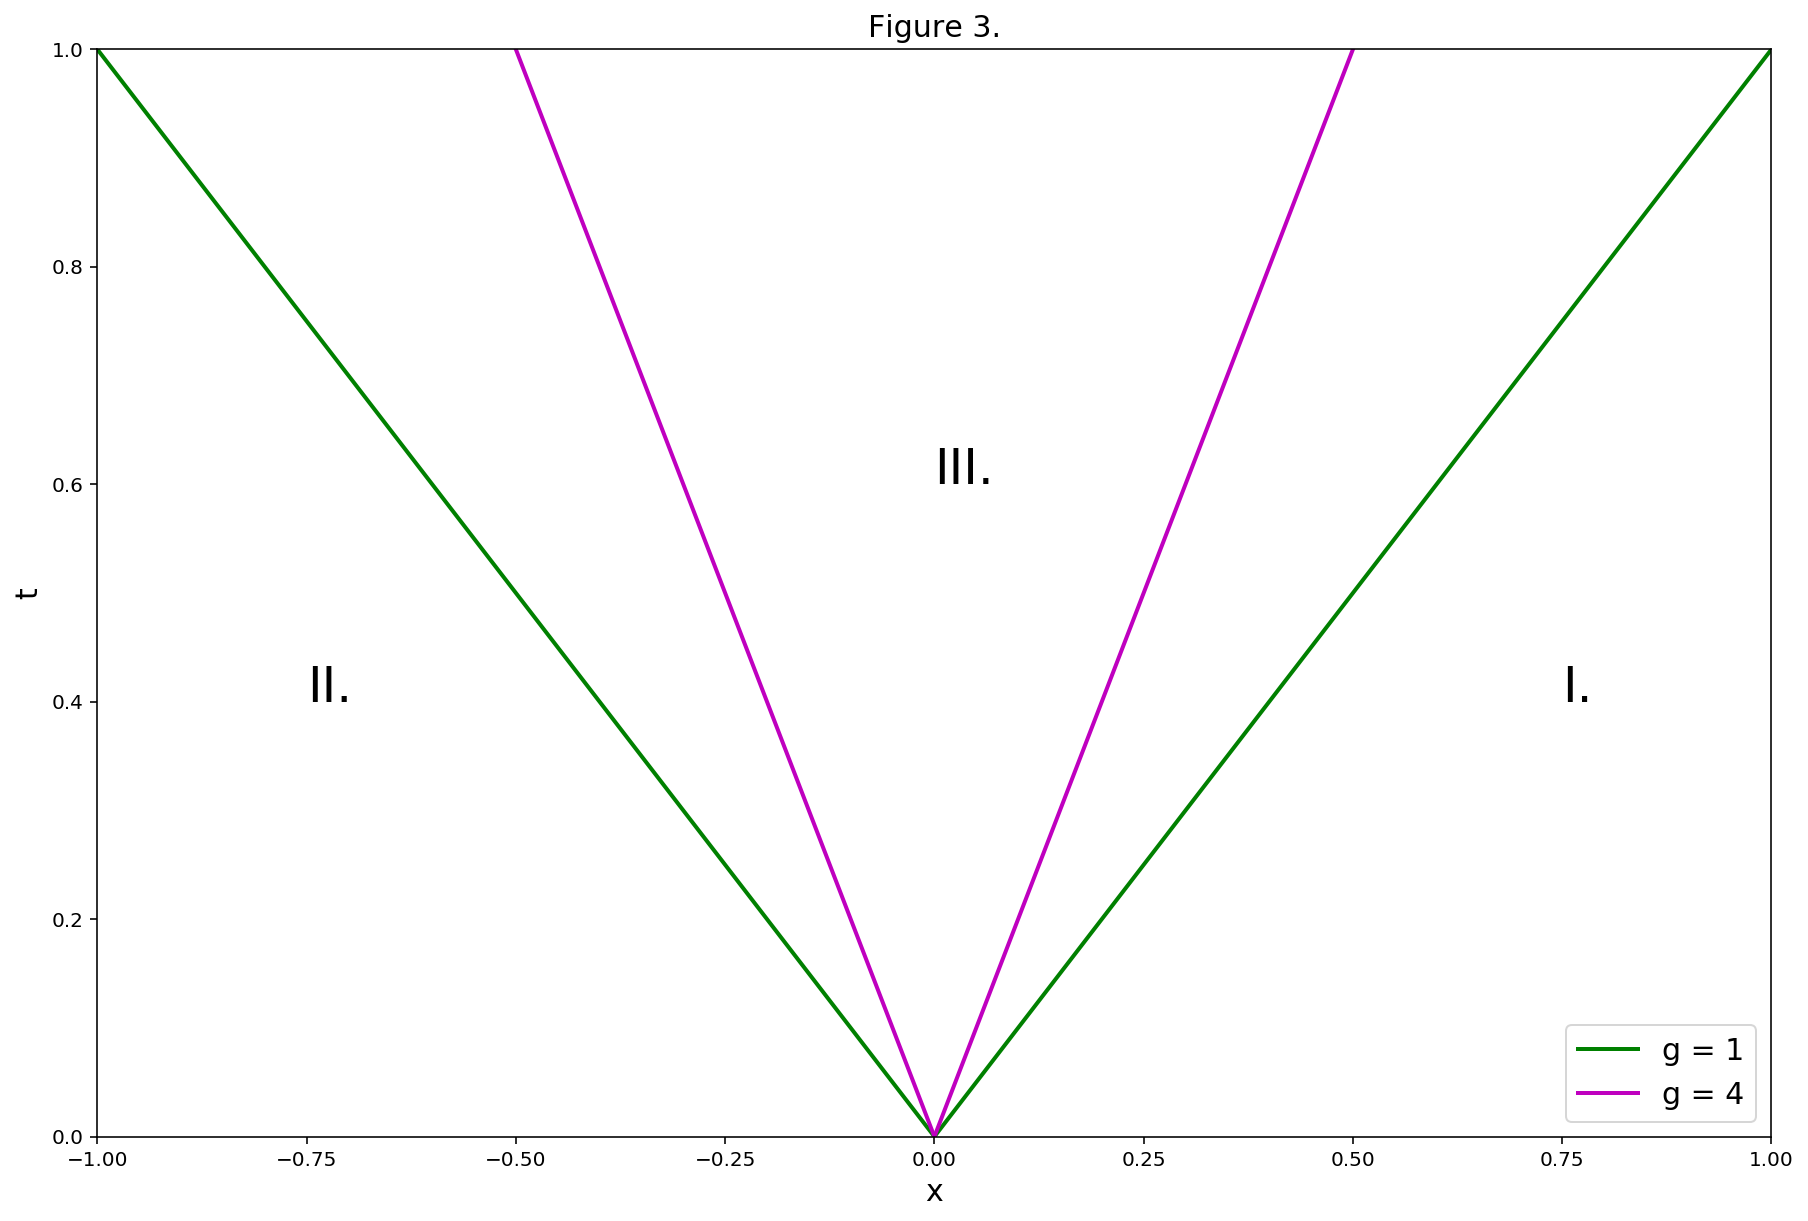

In [29]:
# visualizing the problem in the characteristic plane
xR = np.linspace(0,1.0,10)
xL = np.linspace(0,-1.0,10)
t = np.linspace(0,1.0,10)
plt.figure(figsize=(15,10))
plt.xlabel('x', fontsize=15)
plt.ylabel('t', fontsize=15)
for g,color in zip([1.0,4.0],['g','m']):
    v = np.sqrt(g*D) 
    plt.plot(xR, t*v, color=color, linewidth=2,label='g = %.0f'%g)
    plt.plot(xL, t*v, color=color, linewidth=2)
plt.text(0.75, 0.4, 'I.', fontsize=25)
plt.text(-0.75, 0.4, 'II.', fontsize=25)
plt.text(0.0, 0.6, 'III.', fontsize=25)
plt.title('Figure 3.',fontsize=15)
plt.legend(loc='lower right',fontsize=15)
plt.axis([-1,1,0,1.0])

In [58]:
# exact solution for h(x,t) and u(x,t)
def h(x,t,h0,u0,t0,D0,a,g):
    # first sort out which x fall within which region (I,II,III) for the given time
    
    # Characteristic Velocities
    vp = u0 + np.sqrt(g*D0)
    vm = u0 - np.sqrt(g*D0)
    
    bL = vm*t
    bR = vp*t
    
    mI = np.where(x>bR)[0]
    mII = np.where(x<bL)[0]
    mIII = np.intersect1d(np.where(x<=bR)[0],np.where(x>=bL)[0])
    
    hx,ux = np.zeros(len(x)), np.zeros(len(x))
    
    # Region II (R):
    hx[mII] = D0+a
    ux[mII] = 0
    
    # Region III (C):
    hx[mIII] = D0
    ux[mIII] = a*np.sqrt(g/D0)
    
    # Region I (L):
    hx[mI] = D0-a
    ux[mI] = 0

    return hx, ux



   

[-2, 2, 0, 1.2]

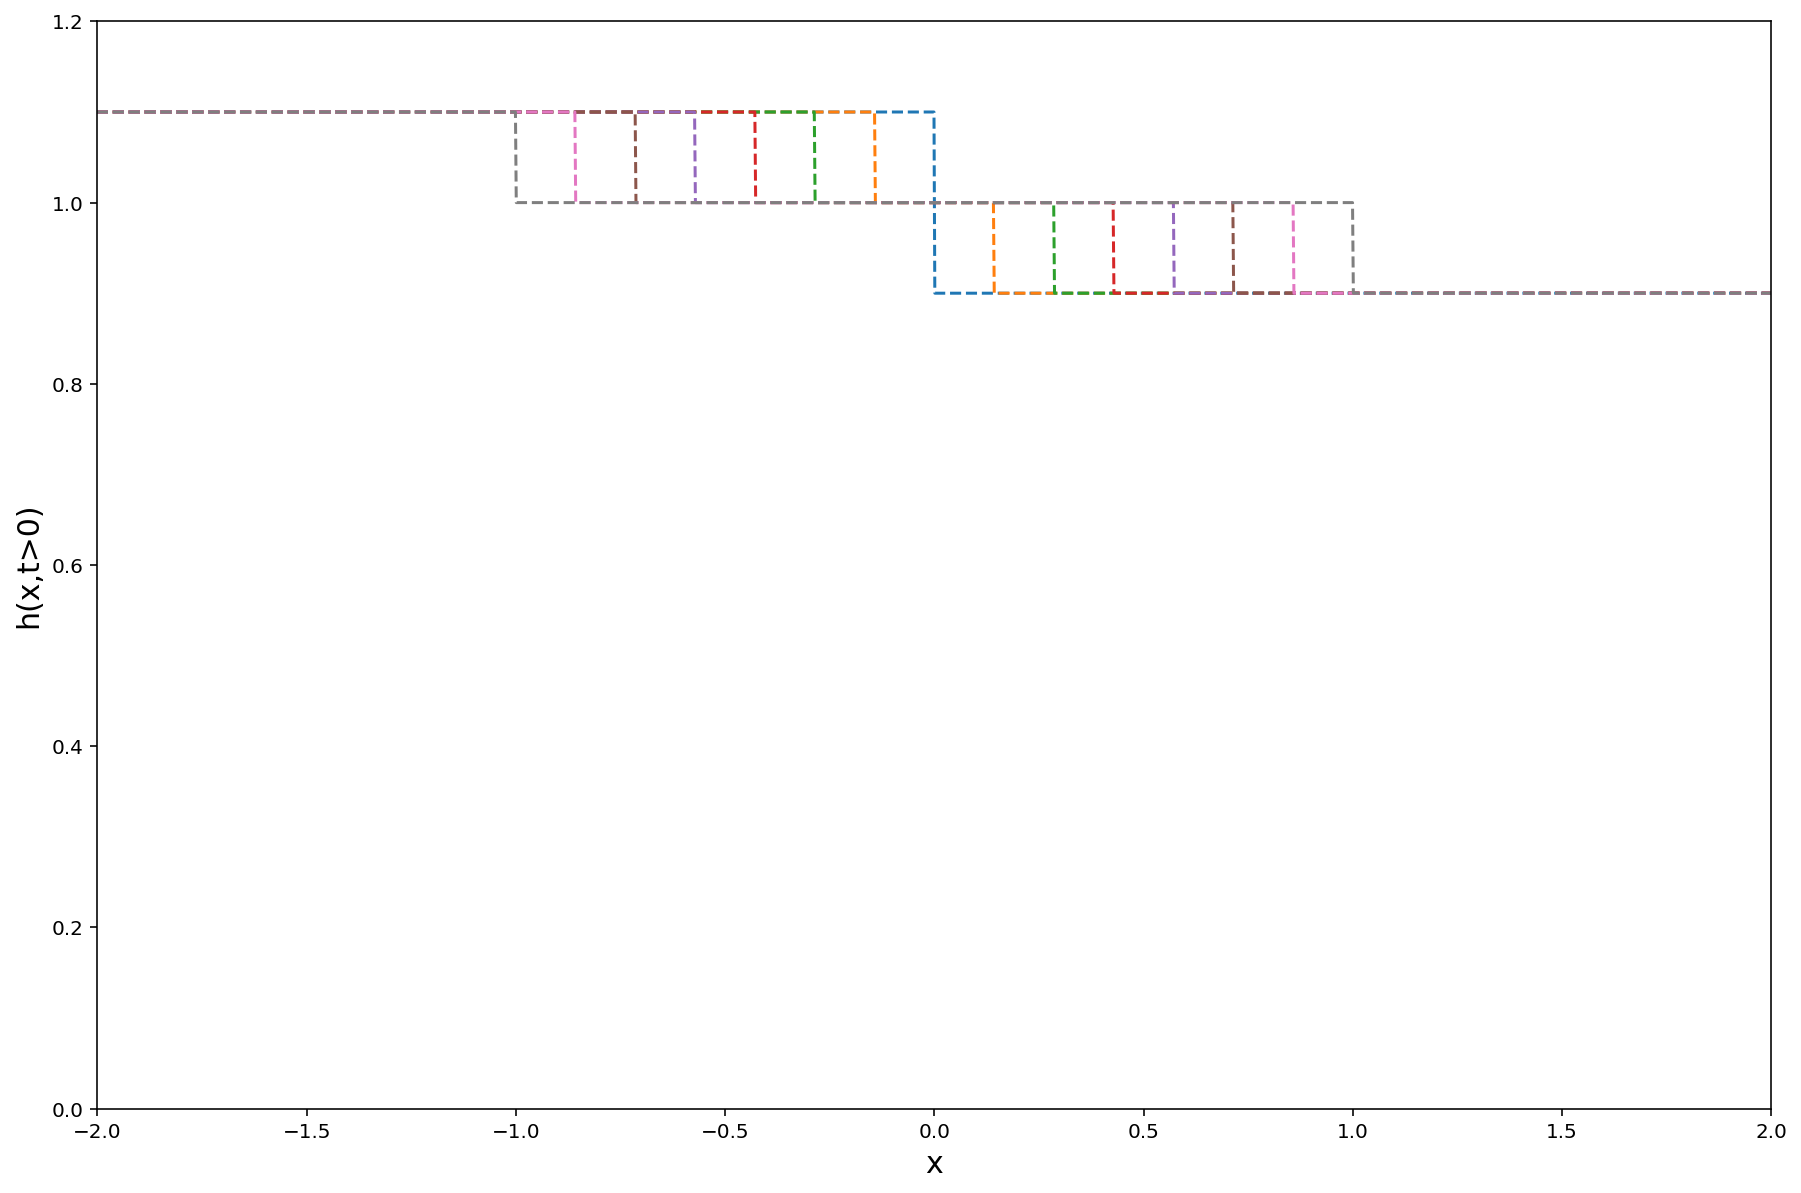

In [60]:
# make a movie, or plot with h(x,t) and u(x,t) for several t
u0 = 0.0
D0 = 1.0
a = 0.1
t0 =0.0
g = 1.0
h0 = np.concatenate((np.zeros(50)+D0+a,np.zeros(50)+D0-a))
x = np.linspace(-10.0,10.0,10000)

plt.figure(figsize=(15,10))
for t in np.linspace(0.0,1.0,8):
    ht,ut = h(x,t,h0,u0,t0,D0,a,g)
    plt.plot(x,ht,linestyle='--')

plt.ylabel('h(x,t>0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-2,2,0,1.2]) 

A shockwave is the discontinuous solutions to the Riemann Problem. It forms in a nonlinear system of equations, for which the Jump Conditions are: <br />
$s(q_* - q) = f(q_*) - f(q)$
<br />

When the shallow water equations are plugged into the jump conditions, the system of algebraic equations are (Rankine-Hugoniot condtions):
$s(h_* - h) = h_*u_* - hu \\
s(h_*q_* - hu) = h_*u+*^2 - hu^2 + \frac{1}{2}g(h_*^2 - h^2)$

Solving for the unknowns, the shockwave solution is: <br />
$u(h) = u_* \pm (h_* - h)\sqrt{\frac{g}{2}(\frac{1}{h} + \frac{1}{h_*})} \\
s(h) = (h_*u_* - hu)/(h_* - h)$

The general Riemann Solver for the Shallow Water Equations is: <br />

$\phi_-(h) =\begin{cases}
    u_- + 2(\sqrt{gh_-} - \sqrt{gh}),& \text{if } h\lt h_-\\
    u_- - (h-h_-)\sqrt{\frac{g}{2}(\frac{1}{h} + \frac{1}{h_-})}, & \text{if } h\gt h_-
\end{cases}
$ <br />

$\phi_+(h) =\begin{cases}
    u_+ - 2(\sqrt{gh_+} - \sqrt{gh}),& \text{if } h\lt h_+\\
    u_+ + (h-h_+)\sqrt{\frac{g}{2}(\frac{1}{h} + \frac{1}{h_+})}, & \text{if } h\gt h_+
\end{cases}
$ <br />

# Some Notes
"A Riemann problem is a specific initial value problem composed of a conservation equation together with piecewise constant initial data which has a single discontinuity in the domain of interest." -wikipedia

"For a first-order PDE (partial differential equation), the method of characteristics discovers curves (called characteristic curves or just characteristics) along which the PDE becomes an ordinary differential equation (ODE). Once the ODE is found, it can be solved along the characteristic curves and transformed into a solution for the original PDE."

"The Sod shock tube problem, named after Gary A. Sod, is a common test for the accuracy of computational fluid codes, like Riemann solvers, and was heavily investigated by Sod in 1978.

The test consists of a one-dimensional Riemann problem with the following parameters, for left and right states of an ideal gas

$\left( \begin{array}{c}\rho_L\\P_L\\v_L\end{array}\right)=\left( \begin{array}{c}1.0\\1.0\\0.0\end{array} \right),$ 

$\left( \begin{array}{c}\rho_R\\P_R\\v_R\end{array}\right)=\left( \begin{array}{c}0.125\\0.1\\0.0\end{array}\right)$

The time evolution of this problem can be described by solving the Euler equations, which leads to three characteristics, describing the propagation speed of the various regions of the system. Namely the rarefaction wave, the contact discontinuity and the shock discontinuity. If this is solved numerically, one can test against the analytical solution, and get information how well a code captures and resolves shocks and contact discontinuities and reproduce the correct density profile of the rarefaction wave.
"